In [2]:
#checking notebook
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#import graphviz  
from sklearn import tree
#import pydot
from sklearn.tree import export_graphviz
#import pydotplus
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pgmpy.sampling import BayesianModelSampling
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

c:\Users\user\anaconda3\envs\joshua_env\lib\site-packages\pgmpy\global_vars.py:11: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem . (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:84.)
  device = torch.device("cpu")
c:\Users\user\anaconda3\envs\joshua_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('Telco-Customer-Churn Dataset.csv')

In [4]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [7]:
produce_missing_report(df)

,column_name,percent_missing
customerID,customerID,0.0
gender,gender,0.0
SeniorCitizen,SeniorCitizen,0.0
Partner,Partner,0.0
Dependents,Dependents,0.0
tenure,tenure,0.0
PhoneService,PhoneService,0.0
MultipleLines,MultipleLines,0.0
InternetService,InternetService,0.0
OnlineSecurity,OnlineSecurity,0.0


In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
to_drop = ['customerID']
df = df.drop(to_drop, axis=1)

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
le = LabelEncoder()

Gender: Male-0, Female-1

In [14]:
df['gender'] = le.fit_transform(df['gender'])

PhoneService: Yes-1, No-0

In [15]:
df['PhoneService'] = le.fit_transform(df['PhoneService'])

MultipleLines: No-0, No PhoneService-1, Yes-2

In [16]:
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])

InternetService: DSL-0, Fiber Optic-1, No-2

In [17]:
df['InternetService'] = le.fit_transform(df['InternetService'])

Partner: Yes-1, No-0

In [18]:
df['Partner'] = le.fit_transform(df['Partner'])

Contract: Month to Month-0, 1 Year-1, 2 Years-2

In [19]:
df['Contract'] = le.fit_transform(df['Contract'])

PaymentMethod: Bank Transfer-0, Credit Card-1, Electronic Check-2, Mailed Check-3

In [20]:
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

Churn: No-0, Yes-1

In [21]:
df['Churn'] = le.fit_transform(df['Churn'])

Dependents: No-0, Yes-1

In [22]:
df['Dependents'] = le.fit_transform(df['Dependents'])

OnlineSecurity: No-0, No Internet Service-1, Yes-2

In [23]:
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])

OnlineBackup: No-0, No Internet Service-1, Yes-2

In [24]:
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])

DeviceProtection: No-0, No Internet Service-1, Yes-2

In [25]:
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])

TechSupport: No-0, No Internet Service-1, Yes-2

In [26]:
df['TechSupport'] = le.fit_transform(df['TechSupport'])

StreamingTV: No-0, No Internet Service-1, Yes-2

In [27]:
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])

StreamingMovies: No-0, No Internet Service-1, Yes-2

In [28]:
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])

PaperlessBilling: No-0, Yes-1

In [29]:
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])

In [30]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

TotalCharges had empty sets so the conversion to a float was did as followed, where we used the mean of the values to be substitued into the empty sets and then the datatype was changed to float.

In [31]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [32]:
print((df['TotalCharges'] == ' ').sum())

0


In [33]:
mean_value = df['TotalCharges'].astype(float).mean()
df['TotalCharges'] = df['TotalCharges'].replace(' ', mean_value).astype(float)

In [34]:
median_value = df['TotalCharges'].astype(float).median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_value).astype(float)

In [35]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Implementation of the Boruta Algortihm.
Convert the DataFrame object to a numpy array.

In [36]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Parameters.

In [37]:
estimator = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_selector = BorutaPy(estimator, n_estimators='auto', verbose=2, random_state=42)

In [38]:
boruta_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	4
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=105, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x20D8E06A840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x20D8E06A840, verbose=2)

In [39]:
selected_features = df.columns[:-1][boruta_selector.support_]
print(selected_features)

Index(['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [40]:
to_drop = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
df = df.drop(to_drop, axis=1)

In [41]:
df.head(5)

,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,2,1,0,0,0,0,0,1,2,70.70,151.65,1


### Beautification/Labelling of dataset.

In [42]:
df.rename(columns={"tenure": "Tenure (Months)"}, inplace=True)
df.rename(columns={"InternetService": "InternetService (DSL-0, FO-1, NO-2)"}, inplace=True)
df.rename(columns={"OnlineSecurity": "OnlineSecurity (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"OnlineBackup": "OnlineBackup (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"DeviceProtection": "DeviceProtection (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"TechSupport": "TechSupport (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"Contract": "Contract (M to M-0, 1 Year-1, 2 Years-2)"}, inplace=True)
df.rename(columns={"PaperlessBilling": "PaperlessBilling (No-0, Yes-1)"}, inplace=True)
df.rename(columns={"PaymentMethod": "PaymentMethod(BT-0, CC-1, EC-2, MC-3)"}, inplace=True)
df.rename(columns={"Churn": "Churn (No-0, Yes-1)"}, inplace=True)


In [43]:
df.head(10)

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,2,1,0,0,0,0,0,1,2,70.70,151.65,1
5,8,1,0,0,2,0,0,1,2,99.65,820.50,1
6,22,1,0,2,0,0,0,1,1,89.10,1949.40,0
7,10,0,2,0,0,0,0,0,3,29.75,301.90,0
8,28,1,0,0,2,2,0,1,2,104.80,3046.05,1
9,62,0,2,2,0,0,1,0,0,56.15,3487.95,0


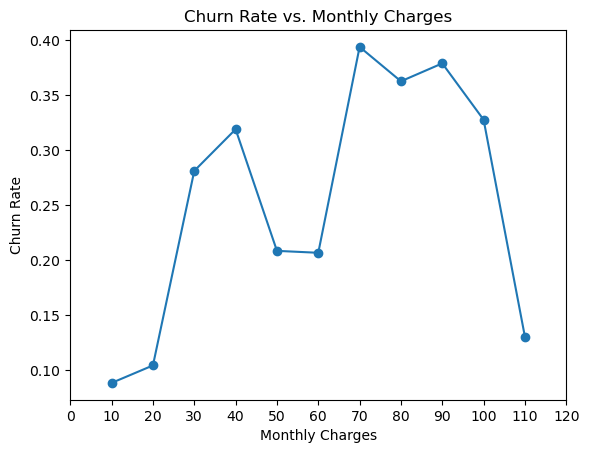

In [48]:
# Define the bins for monthly charges
bins = np.arange(0, 200, 10)

# Group the data by the bins and calculate the mean churn rate for each bin
groups = df.groupby(pd.cut(df['MonthlyCharges'], bins))['Churn (No-0, Yes-1)'].mean()

# Plot the line graph
plt.plot(bins[:-1], groups, marker='o')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Monthly Charges')
plt.xticks(np.arange(0, 121, 10))
plt.show()

### Explanation of Churn Rate vs Monthly Charges

This code is creating a line plot that shows the relationship between monthly charges and the churn rate of customers. It first defines bins for monthly charges, groups the data by the bins, calculates the mean churn rate for each bin, and then plots the data on a line graph. The x-axis represents monthly charges, the y-axis represents the churn rate, and each data point on the graph represents the mean churn rate for customers within a particular monthly charge range. The graph is titled "Churn Rate vs. Monthly Charges" and the x-ticks are set to show every 10 increments.

In [49]:
totalcharges_df = df.sort_values(by=['TotalCharges'], ascending=True)
totalcharges_df

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
1654,1,2,1,1,1,1,1,0,3,18.80,18.80,0
6489,1,2,1,1,1,1,0,1,3,18.85,18.85,1
1151,1,2,1,1,1,1,0,0,2,18.85,18.85,0
4939,1,2,1,1,1,1,0,0,3,18.90,18.90,0
583,1,2,1,1,1,1,0,1,3,19.00,19.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,71,1,2,2,2,2,2,1,2,116.25,8564.75,0
5347,72,1,2,2,2,2,2,1,1,116.95,8594.40,0
6768,72,1,2,2,2,2,2,0,1,117.50,8670.10,0
4586,72,1,2,2,2,2,2,1,0,118.75,8672.45,0


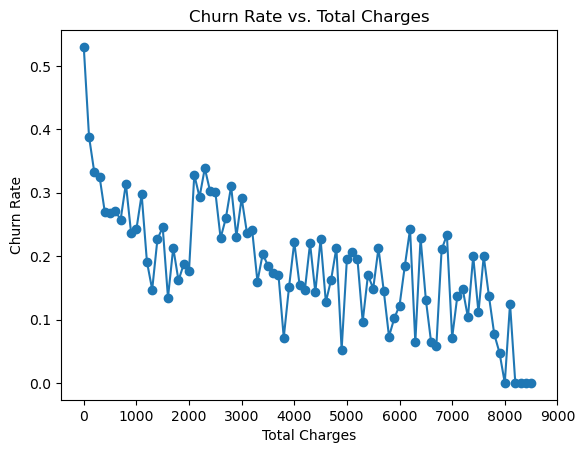

In [50]:
# Define the bins for total charges
bins = np.arange(0, 8700, 100)

# Group the data by the bins and calculate the mean churn rate for each bin
groups = totalcharges_df.groupby(pd.cut(totalcharges_df['TotalCharges'], bins))['Churn (No-0, Yes-1)'].mean()

# Plot the line graph
plt.plot(bins[:-1], groups, marker='o')
plt.xlabel('Total Charges')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Total Charges')
plt.xticks(np.arange(0,9001, 1000))
plt.show()

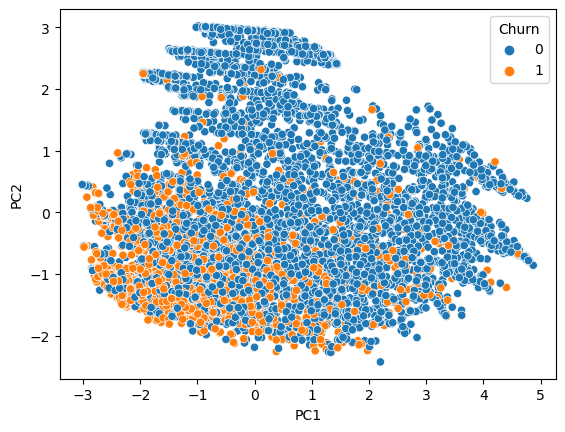

,PC1,PC2,Churn
0,-2.107495,-0.638830,0
1,-0.044543,0.801054,0
2,-1.548340,-0.360859,1
3,1.362191,1.289746,0
4,-2.467900,-1.033297,1
...,...,...,...
7038,0.630363,-0.169225,0
7039,2.591018,-1.854760,0
7040,-1.890868,-0.163898,0
7041,-2.596605,-1.001000,1


In [51]:
# assume df is your DataFrame containing the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardize the features
features = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# perform PCA with n_components=2
pca = PCA(n_components=2)
pca.fit(features_scaled)
pca_transformed = pca.transform(features_scaled)

# create a new DataFrame containing the PCA results
pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2'])
pca_df[' '] = df['Churn (No-0, Yes-1)'] # add back the target variable
pca_df.rename(columns={" ": "Churn"}, inplace=True)
# visualize the results
sns.scatterplot(x='PC1', y='PC2', hue = 'Churn', data=pca_df)
plt.show()

pca_df

In [52]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import K2Score
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian model structure
model = BayesianModel([('PC1', 'PC2'), ('Churn', 'PC2')])

# Define the conditional probability distributions (CPDs)
cpd_pc1 = TabularCPD(variable='PC1', variable_card=2, values=[[0.5], [0.5]])
cpd_churn = TabularCPD(variable='Churn', variable_card=2, values=[[0.5], [0.5]])
cpd_pc2 = TabularCPD(variable='PC2', variable_card=2,
                      values=[[0.1, 0.9, 0.7, 0.3], [0.9, 0.1, 0.3, 0.7]],
                      evidence=['PC1', 'Churn'], evidence_card=[2, 2])

# Add the CPDs to the model
model.add_cpds(cpd_pc1, cpd_churn, cpd_pc2)

# Check if the model is valid
print(model.check_model())

# Infer using the Variable Elimination algorithm
infer = VariableElimination(model)


True


c:\Users\user\anaconda3\envs\joshua_env\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


c:\Users\user\anaconda3\envs\joshua_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


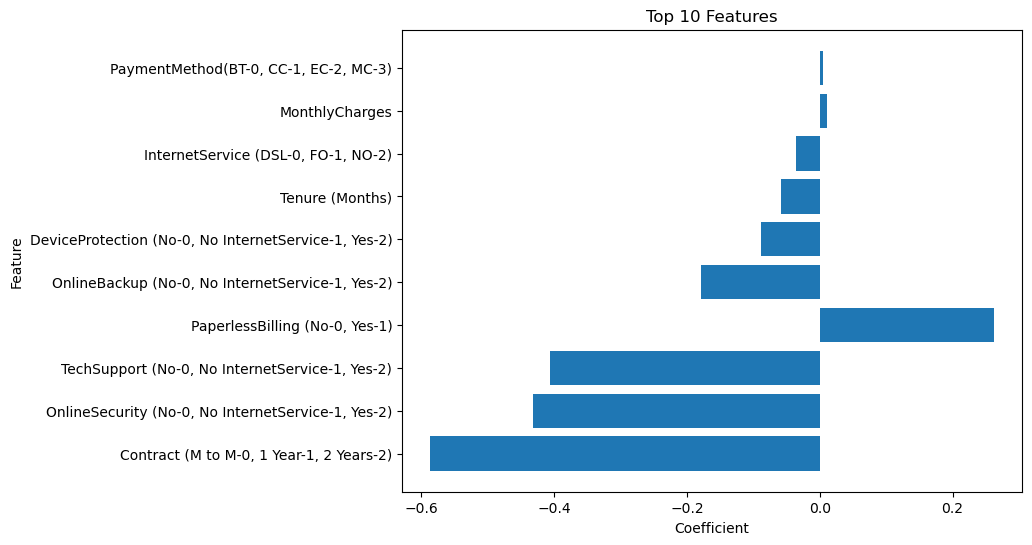

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.55      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [53]:
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
#X = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
#y = df['Churn (No-0, Yes-1)']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = logreg.predict(X_test)

# Evaluate the model performance
#print(classification_report(y_test, y_pred))

# Split the data into training and testing sets
X = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get the coefficients of the logistic regression model
coef = logreg.coef_[0]

# Create a DataFrame with the coefficients and feature names
df_coef = pd.DataFrame({'coef': coef, 'feature': X.columns})

# Sort the DataFrame by the absolute value of the coefficients
df_coef = df_coef.reindex(df_coef['coef'].abs().sort_values(ascending=False).index)

# Plot a bar graph of the top n features
n = 10
plt.figure(figsize=(8, 6))
plt.barh(df_coef['feature'].head(n), df_coef['coef'].head(n))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top {} Features'.format(n))
plt.show()

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

The results of the logistic regression model can be interpreted as follows:

Precision: the proportion of true positives among the predicted positives. In this case, precision for class 0 is 0.85 and for class 1 is 0.61. This means that among all the instances predicted as class 0, 85% are truly class 0 and among all the instances predicted as class 1, 61% are truly class 1.

Recall: the proportion of true positives among the actual positives. In this case, recall for class 0 is 0.88 and for class 1 is 0.56. This means that among all the instances that are actually class 0, 88% are correctly identified as class 0 and among all the instances that are actually class 1, 56% are correctly identified as class 1.

F1-score: the harmonic mean of precision and recall, which gives a balanced measure of both precision and recall. In this case, F1-score for class 0 is 0.87 and for class 1 is 0.58.

Accuracy: the proportion of correct predictions among all the predictions. In this case, the overall accuracy of the model is 0.80.

Macro average: the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is treated equally. In this case, the macro average F1-score is 0.73.

Weighted average: the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is weighted by the number of samples in the class. In this case, the weighted average F1-score is 0.80.

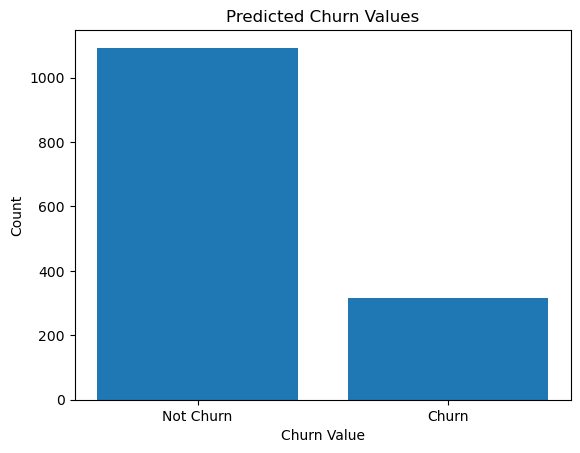

In [54]:
# Define the labels for the x-axis
labels = ['Not Churn', 'Churn']

# Count the number of predicted churn values
unique, counts = np.unique(y_pred, return_counts=True)

# Create a bar chart of the predicted churn values
plt.bar(unique, counts)

# Set the x-axis labels using the labels defined above
plt.xticks(unique, labels)

# Add labels and title to the chart
plt.title('Predicted Churn Values')
plt.xlabel('Churn Value')
plt.ylabel('Count')

# Display the chart
plt.show()

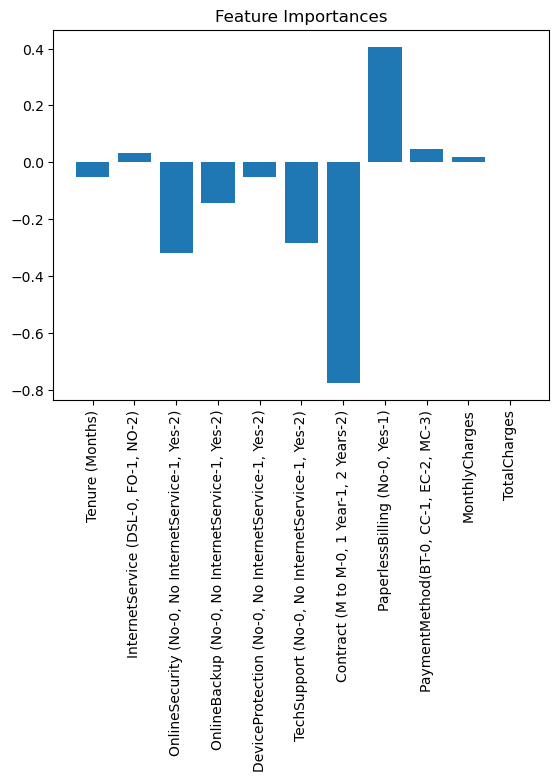

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.55      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [55]:
# Split the data into training and testing sets
X = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the model
coef = logreg.coef_[0]

# Plot the feature importances as a bar chart
plt.bar(range(len(coef)), coef)
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.title('Feature Importances')
plt.show()

# Evaluate the model performance
print(classification_report(y_test, y_pred))

BALANCING THE DATASET USING SMOTE

In [ ]:
X = df.drop('Churn (No-0, Yes-1)', axis=1)
y = df['Churn (No-0, Yes-1)']

# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Concatenate majority and upsampled minority
df_upsampled = pd.concat([X_smote, y_smote], axis=1)

# Verify class distribution
print(df_upsampled['Churn (No-0, Yes-1)'].value_counts())

0    5174
1    5174
Name: Churn (No-0, Yes-1), dtype: int64


In [ ]:
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X = df_upsampled.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df_upsampled['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1044
           1       0.77      0.81      0.79      1026

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



c:\Users\user\anaconda3\envs\joshua_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


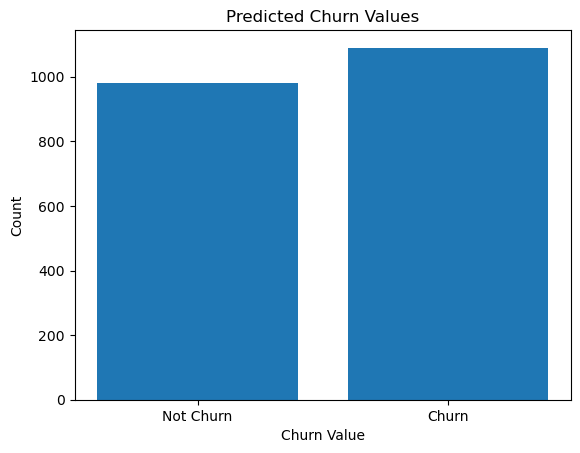

In [ ]:
# Define the labels for the x-axis
labels = ['Not Churn', 'Churn']

# Count the number of predicted churn values
unique, counts = np.unique(y_pred, return_counts=True)

# Create a bar chart of the predicted churn values
plt.bar(unique, counts)

# Set the x-axis labels using the labels defined above
plt.xticks(unique, labels)

# Add labels and title to the chart
plt.title('Predicted Churn Values')
plt.xlabel('Churn Value')
plt.ylabel('Count')

# Display the chart
plt.show()

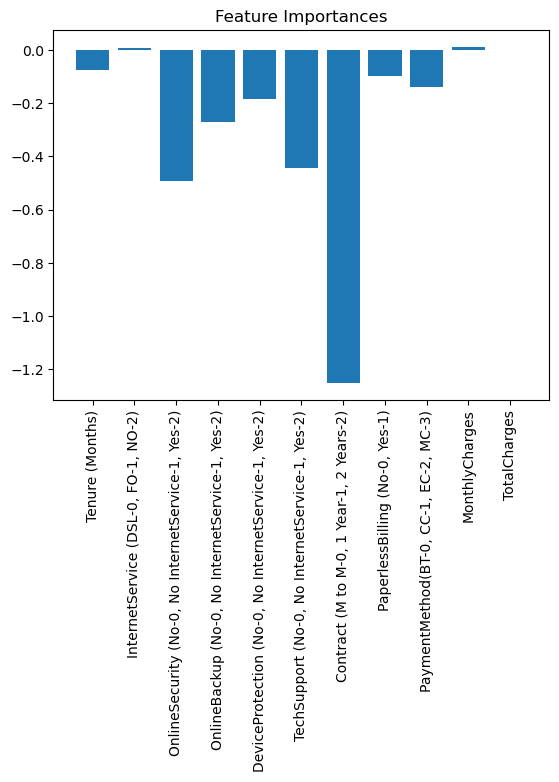

In [ ]:
# Split the data into training and testing sets
X = df_upsampled.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df_upsampled['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the model
coef = logreg.coef_[0]

# Plot the feature importances as a bar chart
plt.bar(range(len(coef)), coef)
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.title('Feature Importances')
plt.show()


### Explanation on the variation of results between the Random Forest model and the Logistic Regression Model

It is possible to get different results for feature importance when using different models like Random Forest and Logistic Regression. This is because each model has its own way of evaluating the importance of features.

For instance, Random Forest uses decision trees to evaluate the importance of features, and it measures the importance of a feature by the amount that it reduces the impurity of the nodes in the trees. On the other hand, Logistic Regression uses the magnitude of the coefficients as a measure of feature importance.

Therefore, it is important to evaluate the feature importance using multiple methods to get a more complete picture of which features are important in the given problem. Additionally, it is always recommended to explore the data and problem domain in depth to gain insights into the factors that are driving the outcome variable.

In [ ]:
df_test = pd.read_csv('Telco-Customer-Churn Dataset.csv')

In [ ]:
to_drop = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
df_test= df_test.drop(to_drop, axis=1)

In [ ]:
df_test.head()

,customerID,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_test.dtypes

customerID           object
tenure                int64
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Logistical Regression
***
Logistical Regression is type of statistical model that is often used for classification and predictive analytics.It estimates the probability of an event occurring, in this case Churn or did not Churn, based on the given dataset of independent variables.<br>
This project uses Binary Logistical Regression.<br>
The model will identify relationships between our target feature, Churn, and our remaining features to apply probabilistic calculations for determining which class the customer should belong to.<br>
We will utilize the ‘ScikitLearn’ package in Python.


### Assumptions for Logistic Regression
1. Binary logistic regression requires the dependent variable to be binary and to follow a binomial distribution,in this instance will a customer discontinue service or not, Yes or No. For more than 2 outcomes (ordinal) logistics regression requires the dependent variable categories to be mutually exclusive and exhaustive.
1. Observations should be independent of each other (e.g. data of one customer should not depend on data of another customer, or the same customer should not be used repeatedly in the data)
1. Multicollinearity among the independent variables should not exist ,customer data that is dependent on each rather than independent should not be used.
1. The linearity of independent variables with respect to log odds of the dependent variable (e.g. log odds of the probability of customer discontinuing the service should be linearly related to various variables like gender, income, etc.)
1. Large sample size 

In [ ]:
df.dtypes

Tenure (Months)                                           int64
InternetService (DSL-0, FO-1, NO-2)                       int32
OnlineSecurity (No-0, No InternetService-1, Yes-2)        int32
OnlineBackup (No-0, No InternetService-1, Yes-2)          int32
DeviceProtection (No-0, No InternetService-1, Yes-2)      int32
TechSupport (No-0, No InternetService-1, Yes-2)           int32
Contract (M to M-0, 1 Year-1, 2 Years-2)                  int32
PaperlessBilling (No-0, Yes-1)                            int32
PaymentMethod(BT-0, CC-1, EC-2, MC-3)                     int32
MonthlyCharges                                          float64
TotalCharges                                            float64
Churn (No-0, Yes-1)                                       int32
dtype: object

From previous code we see that there are no missing data.It can be noted that that the majority of our data are of ‘object’ type, our categorical data. This will be our primary area of focus in the preprocessing step. <br>
At the top of the data, there was a  column that is unnecessary, ‘customerID’. This column will be irrelevant to our data, as it is a unique identifier of the customer which is something we do not want so it was perviously dropped.<br>
Additionally  the yes and no values in the churn column was change to the binary values 1 and 0 in order for the values to be easier to interpret.

In [ ]:
df_test = df_test.iloc[:,1:]

In [ ]:
df_test.Churn.replace({"Yes":1, "No":0}, inplace = True)

In [ ]:
df_test.head()

,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,0
2,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Dummy Dataset
A dummy variable is a binary variable that takes a value of 0 or 1.It is a way of incorporating nominal variables into a regression as a binary value.<br>
Dummy variables allow for the computer to interpret the values of a categorical variable as high(1) or low(0) scores. Since the variables are now numeric, the model can assess directionality and significance in our variables instead of trying to interpret what “Yes” or “No” means.<br>
 When adding dummy variables is performed, it will add new binary features with [0,1] values that the computer can now interpret. 

In [ ]:
dummy_df = pd.get_dummies(df_test)

In [ ]:
#Code to chnage name of Churn column in dummy variable dataset 
dummy_df.rename(columns={"Churn (No-0, Yes-1)":"Churn"}, inplace=True)

In [ ]:
dummy_df.head()

,tenure,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,1,29.85,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,56.95,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,53.85,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,45,42.30,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2,70.70,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Splitting the Data
The code in this section is used to separate our data into the target feature (Churn) and the predicting features.

In [ ]:
# Code to establish target feature(Churn)
y = dummy_df.Churn.values
# Code to drop Churn from remaining features
X = dummy_df.drop('Churn', axis = 1)
# Code to save dataframe column titles to list
cols = X.columns


### Feature Scaling
Our data is full of numeric data but they are all in different units.Since they are different units when compared they will not produce any relevant information so this section provides code to standardize our data values by rescaling an original variable to have equal range and variance as the remaining variables.<br>
We will utilize Min-Max SCaling [0,1] as the standardize value will lie within the binary range .

In [ ]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))


In [ ]:
#Code used to conduct the standard train test split to separate our data into a training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

### Building The Model

In [ ]:
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver 
= 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,6547,6548,6549,6550,6551,6552,6553,6554,6555,6556
3322,0.125000,0.658706,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3523,1.000000,0.933831,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,1.000000,0.854726,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3692,0.041667,0.506468,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4874,0.527778,0.653234,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,0.458333,0.497512,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2706,0.027778,0.578607,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.486111,0.759204,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5848,1.000000,0.852736,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Code to predict our future values.
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)


### Evaluating Model Performance

The following code checks to see how often the model was correct as we are trying to predict whether a customer will leave of not.<br>
In order to do this we used the residual distance between actual training data and predicted training data, as well as actual test data and predicted test data.

#### Non-Normalised and Normalised Train Results 


In [ ]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train, y_hat_train)

# Print the number of times our model was correct ('0') and incorrect ('1')
print("Non-Normalized Train Results:")
print(pd.Series(residuals).value_counts())
print("\n")

# Print normalized amount of times our model was correct (percentage)
print("Normaliszed Train Results")
print(pd.Series(residuals).value_counts(normalize = True))

Non-Normalized Train Results:
0    3893
1    1389
dtype: int64


Normaliszed Train Results
0    0.737031
1    0.262969
dtype: float64


From the above results,we see that there was a 74% correct rate which is a strong number.

#### Non-Normalised and Normalised Test Results 

In [ ]:
# Find residual differences between test data and predicted test data
residuals = np.abs(y_test, y_hat_test)

# Print the number of times our model was correct ('0') and incorrect ('1')
print("Non-Normalized Test Results:")
print(pd.Series(residuals).value_counts())
print("\n")

# Print normalized amount of times our model was correct (percentage)
print("Normalized Test Results")
print(pd.Series(residuals).value_counts(normalize = True))

Non-Normalized Test Results:
0    1281
1     480
dtype: int64


Normalized Test Results
0    0.727428
1    0.272572
dtype: float64


From the above results,we see that there was a 73% correct rate which is a strong number.<br><br>
Our test and train set produced different sizes , so the normalized results are more meaningful here. However,the fact that our model performs about the same on our train and test sets is a positive sign that our model is performing well.

#### Confusion Matrix
A confusion matrix is a visual representation which tells us the degree of four important classification metrics:
-  __True Positives (TP)__: The number of observations where the model predicted the customer would churn (1), and they actually do churn (1)
-  __True Negatives (TN)__: The number of observations where the model predicted the customer would not churn (0), and they actually do not churn (0).
-  __False Positives (FP)__: The number of observations where the model predicted the customer will churn (1), but in real life they do not churn (0).
-  __False Negatives (FN)__: The number of observations where the model predicted the customer will not churn (0), but in real life they do churn (1).


In [ ]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print(cnf_matrix)

[[1281    0]
 [   0  480]]


##### Precision,Recall,Accuracy,F1 score

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

#Precision
precision_train = precision_score(y_train, y_hat_train)
precision_test = precision_score(y_test, y_hat_test)
print("Precision")
print(precision_train)
print(precision_test)
print("\n")

#Recall
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(y_test, y_hat_test)
print("Recall")
print(recall_train)
print(recall_test)
print("\n")

#Accuracy
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)
print("Accuracy")
print(accuracy_train)
print(accuracy_test)
print("\n")

#F1 Score
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)
print("F1 Score")
print(f1_train)
print(f1_test)
print("\n")

Precision
1.0
1.0


Recall
1.0
1.0


Accuracy
1.0
1.0


F1 Score
1.0
1.0




In [ ]:
print('Training Metrics:')
print(f'Training Precision: ', round(precision_score(y_train, y_hat_train), 2))
print(f'Training Recall: ', round(recall_score(y_train, y_hat_train), 2))
print(f'Training Accuracy: ', round(accuracy_score(y_train, y_hat_train), 2))
print(f'Training F1-Score: ', round(f1_score(y_train, y_hat_train), 2))
print('\n')
print(f'Testing Metrics:')
print(f'Testing Precision: ', round(precision_score(y_test, y_hat_test),2))
print(f'Testing Recall: ', round(recall_score(y_test, y_hat_test),2))
print(f'Testing Accuracy: ', round(accuracy_score(y_test, y_hat_test),2))
print(f'Testing F1-Score: ', round(f1_score(y_test, y_hat_test),2))

Training Metrics:
Training Precision:  1.0
Training Recall:  1.0
Training Accuracy:  1.0
Training F1-Score:  1.0


Testing Metrics:
Testing Precision:  1.0
Testing Recall:  1.0
Testing Accuracy:  1.0
Testing F1-Score:  1.0


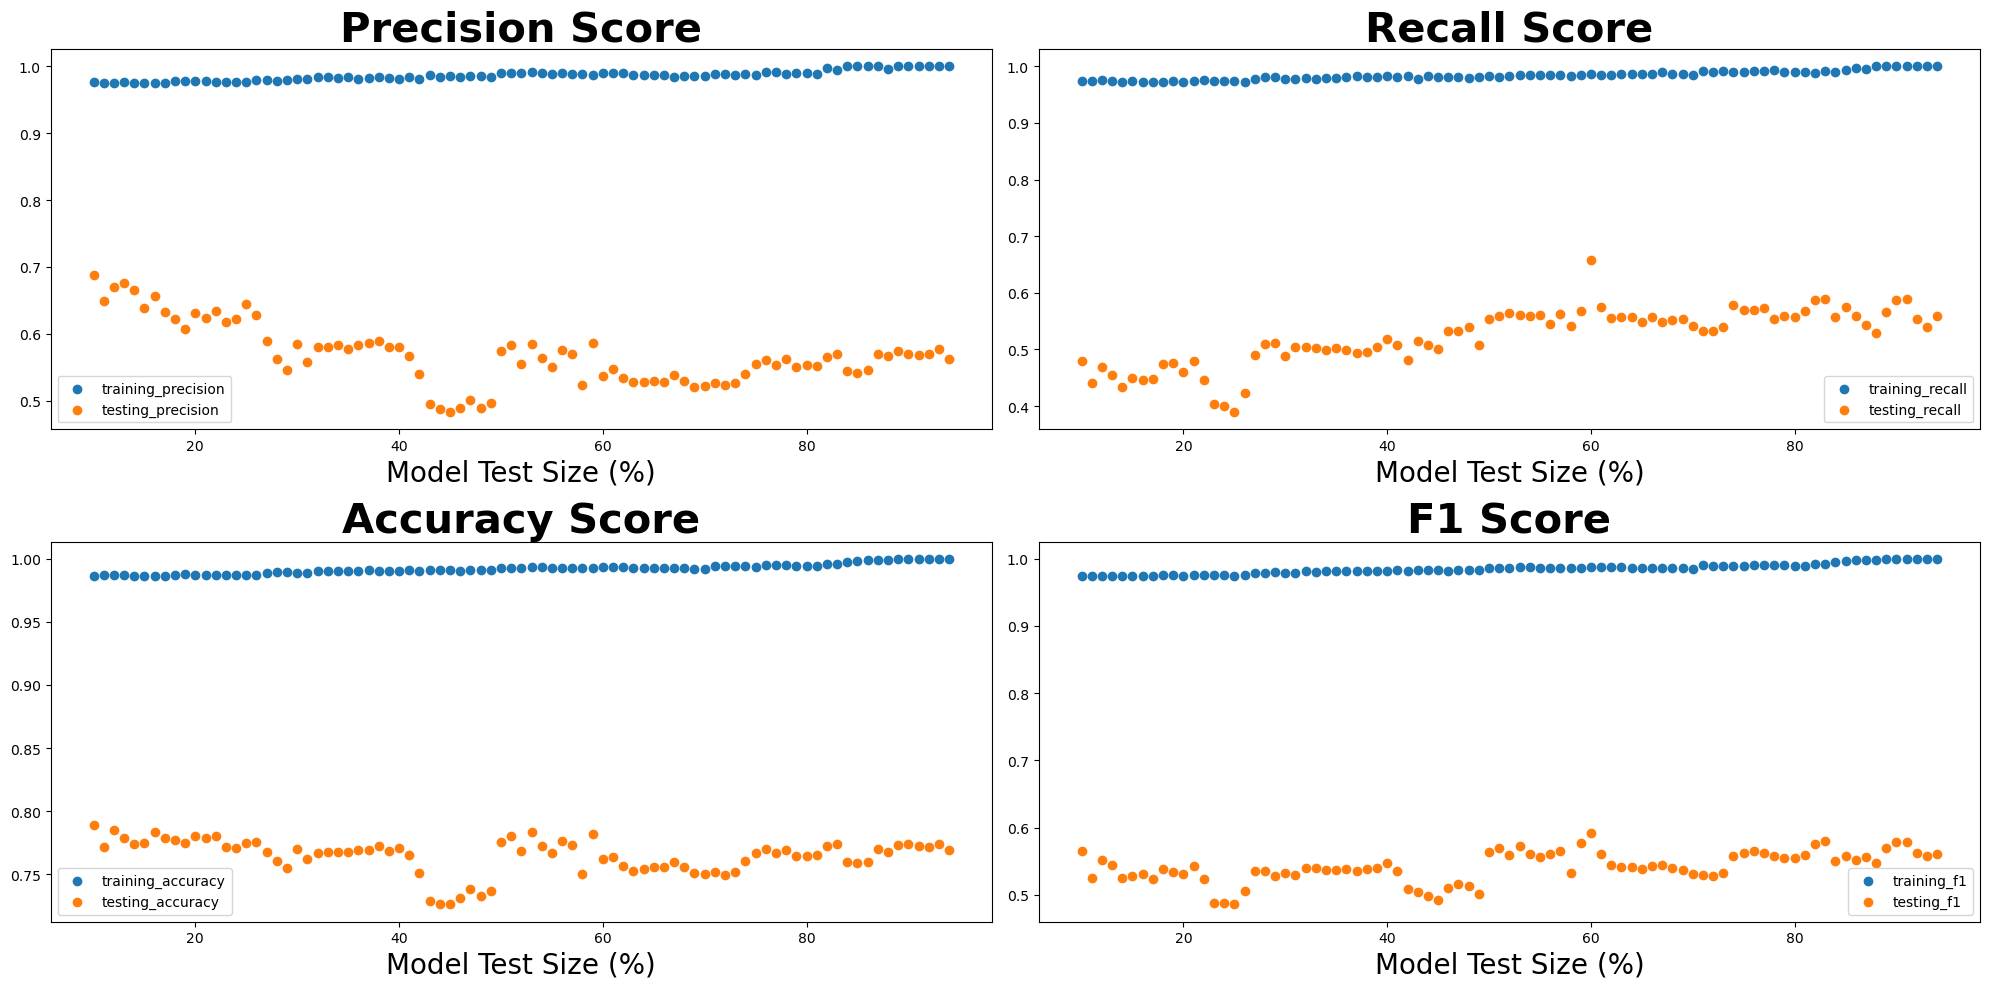

In [ ]:
# Create an empty list for each of the 4 classification metrics (Precision/Recall/Accuracy/F1-Score)
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []
    
    # Iterate through a range of test_sizes to use for our logistic regression, using same parameters as our first logistic regression in our notebook. Append each respective result metric to its respective list.
for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0, random_state = 33)
    logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))
        
    # Use subplots to create a scatter plot of each of the 4 metrics. 
plt.figure(figsize = (20, 10))
plt.subplot(221)
plt.title('Precision Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training precision list
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
    # Scatte4r plot test precision list
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.xlabel('Model Test Size (%)', fontsize = 20)
plt.legend(loc = 'best')

plt.subplot(222)
plt.title('Recall Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training recall list
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
    # Scatter plot test recall list
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.xlabel('Model Test Size (%)', fontsize = 20)
plt.legend(loc = 'best')

plt.subplot(223)
plt.title('Accuracy Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training accuracy list
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
    # Scatter plot test accuracy list
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.xlabel('Model Test Size (%)', fontsize = 20)
plt.legend(loc = 'best')

plt.subplot(224)
plt.title('F1 Score', fontweight = 'bold', fontsize = 30)
    # Scatter plot training f1-score list
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
    # Scatter plot testing f1-score list
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.xlabel('Model Test Size (%)', fontsize = 20)
plt.legend(loc = 'best')

plt.tight_layout()

## Random Forest
***

In [ ]:
df

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
3719,28,2,1,1,1,1,1,0,1,18.25,534.70,0
1529,59,2,1,1,1,1,2,0,0,18.40,1057.85,0
6652,36,2,1,1,1,1,2,1,1,18.55,689.00,0
6906,25,2,1,1,1,1,2,1,3,18.70,383.65,0
1156,53,2,1,1,1,1,2,0,3,18.70,1005.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5127,67,1,2,2,2,2,1,1,0,118.35,7804.15,1
3894,68,1,2,2,2,2,2,0,3,118.60,7990.05,0
4804,61,1,2,2,2,2,1,1,2,118.60,7365.70,0
2115,71,1,2,2,2,2,2,1,2,118.65,8477.60,0


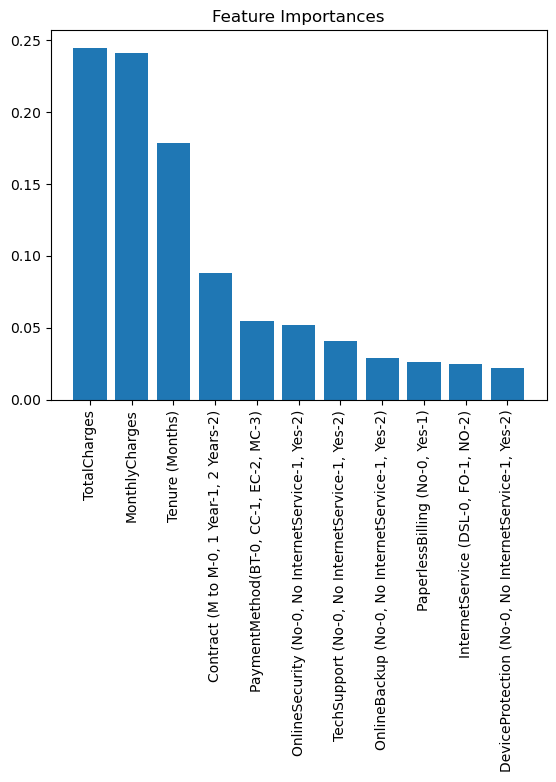

In [ ]:
# separate the features (X) from the target variable (y)
X = df.drop('Churn (No-0, Yes-1)', axis=1)
y = df['Churn (No-0, Yes-1)']

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the data
rf.fit(X, y)

# get the feature importances
importances = rf.feature_importances_

# sort the feature importances in descending order
indices = importances.argsort()[::-1]

# plot the feature importances as a bar chart
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['TotalCharges']], df['Churn (No-0, Yes-1)'], test_size=0.2, random_state=42)

# create a logistic regression model and fit it to the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# make predictions on the testing data using the trained model
y_pred = lr.predict(X_test)

# evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7352732434350603


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# separate the features (X) from the target variable (y)
X = df[['TotalCharges']]
y = df['Churn (No-0, Yes-1)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6366217175301633


In [64]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(random_state=42)

# create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters: ', grid_search.best_params_)
print('Accuracy: ', grid_search.best_score_)


KeyboardInterrupt: 